# Monte Carlo Simulation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_datareader import data
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
import warnings
warnings.filterwarnings("ignore")
from tabulate import tabulate
from pandas_datareader import data as pdr
import plotly.graph_objs as go
plt.style.use('fivethirtyeight')
from prophet import Prophet

C:\Users\niren\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:

# Get data from Yahoo Finance
ticker = 'COKE'
df_yf = pdr.get_data_yahoo(ticker, start='2021-01-04')
df_yf

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2021-01-04  266.279999  269.500000  262.010010  267.140015  263.955475   23900
2021-01-05  266.029999  270.000000  264.000000  268.809998  265.605621   29000
2021-01-06  268.589996  273.000000  268.010010  270.470001  267.245819   38100
2021-01-07  270.540009  270.600006  267.339996  270.040009  266.820953   25900
2021-01-08  270.940002  272.579987  269.519989  272.420013  269.172577   27700
...                ...         ...         ...         ...         ...     ...
2023-04-12  538.700012  539.409973  529.969971  531.000000  531.000000   19000
2023-04-13  531.000000  538.270020  530.000000  537.369995  537.369995   22500
2023-04-14  537.369995  538.099976  531.830017  535.820007  535.820007   27500
2023-04-17  537.750000  538.090027  529.679993  533.299988  533.299988   36300
2023-04-18  535.489990  538.654785  533.909973  538.359985  538.359985   16288

[576 rows x 6 columns]

In [3]:
data = df_yf[['Adj Close']]
data


Adj Close
Date                  
2021-01-04  263.955475
2021-01-05  265.605621
2021-01-06  267.245819
2021-01-07  266.820953
2021-01-08  269.172577
...                ...
2023-04-12  531.000000
2023-04-13  537.369995
2023-04-14  535.820007
2023-04-17  533.299988
2023-04-18  538.359985

[576 rows x 1 columns]

<AxesSubplot:xlabel='Date'>

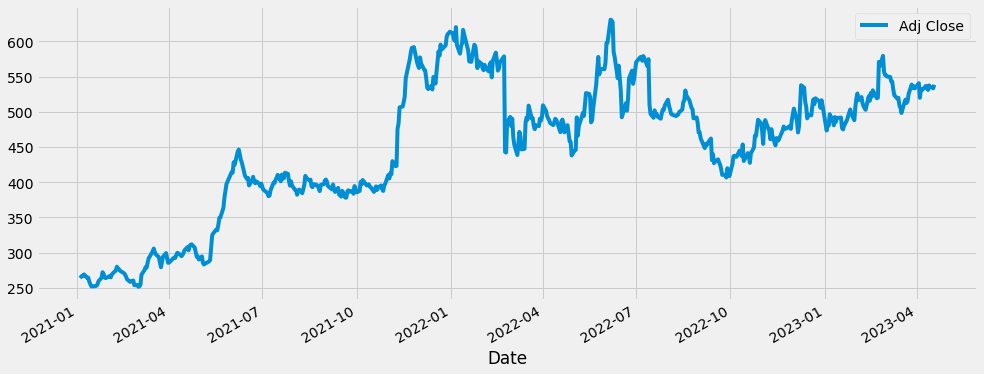

In [4]:
data.plot(figsize=(15,6))

In [5]:
stock_returns = np.log(1 + data.pct_change())
stock_returns.tail()

Adj Close
Date                 
2023-04-12  -0.003759
2023-04-13   0.011925
2023-04-14  -0.002889
2023-04-17  -0.004714
2023-04-18   0.009443

Text(0, 0.5, 'Frequency')

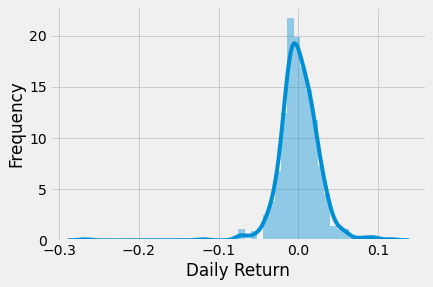

In [6]:
sns.distplot(stock_returns.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

<AxesSubplot:xlabel='Date'>

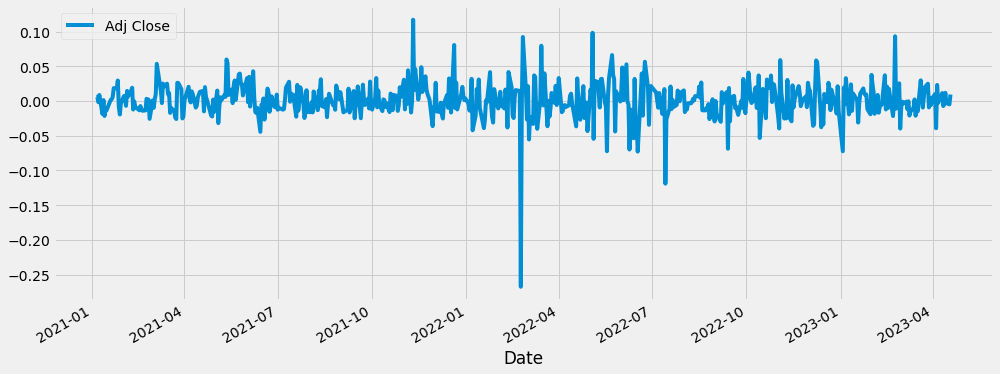

In [7]:
stock_returns.plot(figsize=(15,6))

In [8]:
u = stock_returns.mean()
var = stock_returns.var()

In [9]:
drift = u - (0.5*var)
drift

Adj Close    0.0009
dtype: float64

In [10]:
stddev = stock_returns.std() 
stddev

Adj Close    0.026063
dtype: float64

In [11]:
type(drift)

pandas.core.series.Series

In [12]:
type(stddev)

pandas.core.series.Series

In [13]:
np.array(drift)

array([0.00089993])

In [14]:
drift.values

array([0.00089993])

In [15]:
stddev.values

array([0.02606258])

In [16]:
x = np.random.rand(10,2)
x

array([[0.51423661, 0.01530526],
       [0.73275494, 0.15386727],
       [0.38408775, 0.73886747],
       [0.45140986, 0.07546715],
       [0.07450709, 0.69514555],
       [0.45921876, 0.50519897],
       [0.31202802, 0.77915496],
       [0.27810286, 0.87861404],
       [0.70192158, 0.97847841],
       [0.14539553, 0.60876493]])

In [17]:
norm.ppf(x)

array([[ 0.03569346, -2.16209934],
       [ 0.62116644, -1.01998718],
       [-0.29476225,  0.63985779],
       [-0.12210013, -1.43623918],
       [-1.44302234,  0.51048903],
       [-0.1024021 ,  0.01303225],
       [-0.49011002,  0.76934238],
       [-0.58848661,  1.16808639],
       [ 0.52993522,  2.02329066],
       [-1.05638785,  0.27610146]])

In [18]:
stdev = stock_returns.std()
days = 15
iterations = 50
#Create random value with a given shape in the range from 0 to 1 - np.random.rand(10,2)
Z = norm.ppf(np.random.rand(days, iterations)) #days, trials

In [19]:
get_daily_returns = np.exp(drift.values + stdev.values * Z)

In [20]:
get_daily_returns

array([[0.9962238 , 1.04241054, 0.9835099 , 0.99787629, 0.99371156,
        0.97861914, 1.00642162, 0.99338418, 0.99353731, 1.0398914 ,
        1.0195521 , 0.94064599, 0.96980749, 1.05029688, 1.00223317,
        1.03660487, 1.02328838, 0.96480183, 1.01385063, 0.9971974 ,
        0.99663047, 1.01868154, 1.03070723, 1.05093838, 0.9696865 ,
        1.00927616, 0.94028501, 1.02452483, 0.99080923, 0.95397367,
        0.98982975, 1.02277102, 1.0132407 , 1.02584743, 1.05060764,
        1.02321766, 1.01204259, 0.98125945, 0.98059412, 0.99441904,
        1.0416319 , 1.01178398, 0.97464344, 1.04513281, 1.03439564,
        1.02433688, 0.9702266 , 1.00061016, 0.97705117, 1.02239606],
       [1.01999325, 0.97987495, 1.0052928 , 1.01800495, 1.02709591,
        0.96888106, 1.02925835, 1.02361523, 0.97108   , 1.02032687,
        0.98111403, 1.03665359, 0.97932425, 0.98448782, 0.99910147,
        0.98489155, 0.97394784, 0.98652333, 1.04628526, 1.00925213,
        0.9830703 , 1.01148398, 0.99168643, 0.9

In [21]:
S0 = data.iloc[-1]
S0

Adj Close    538.359985
Name: 2023-04-18 00:00:00, dtype: float64

In [22]:
price_paths = np.zeros_like(get_daily_returns)

In [23]:
price_paths.shape

(15, 50)

In [24]:
price_paths


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [25]:
price_paths[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
price_paths[0] = S0
price_paths

array([[538.35998535, 538.35998535, 538.35998535, 538.35998535,
        538.35998535, 538.35998535, 538.35998535, 538.35998535,
        538.35998535, 538.35998535, 538.35998535, 538.35998535,
        538.35998535, 538.35998535, 538.35998535, 538.35998535,
        538.35998535, 538.35998535, 538.35998535, 538.35998535,
        538.35998535, 538.35998535, 538.35998535, 538.35998535,
        538.35998535, 538.35998535, 538.35998535, 538.35998535,
        538.35998535, 538.35998535, 538.35998535, 538.35998535,
        538.35998535, 538.35998535, 538.35998535, 538.35998535,
        538.35998535, 538.35998535, 538.35998535, 538.35998535,
        538.35998535, 538.35998535, 538.35998535, 538.35998535,
        538.35998535, 538.35998535, 538.35998535, 538.35998535,
        538.35998535, 538.35998535],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
   

In [27]:
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*get_daily_returns[t]

In [28]:
price_paths

array([[538.35998535, 538.35998535, 538.35998535, 538.35998535,
        538.35998535, 538.35998535, 538.35998535, 538.35998535,
        538.35998535, 538.35998535, 538.35998535, 538.35998535,
        538.35998535, 538.35998535, 538.35998535, 538.35998535,
        538.35998535, 538.35998535, 538.35998535, 538.35998535,
        538.35998535, 538.35998535, 538.35998535, 538.35998535,
        538.35998535, 538.35998535, 538.35998535, 538.35998535,
        538.35998535, 538.35998535, 538.35998535, 538.35998535,
        538.35998535, 538.35998535, 538.35998535, 538.35998535,
        538.35998535, 538.35998535, 538.35998535, 538.35998535,
        538.35998535, 538.35998535, 538.35998535, 538.35998535,
        538.35998535, 538.35998535, 538.35998535, 538.35998535,
        538.35998535, 538.35998535],
       [549.12354947, 527.52546542, 541.20941778, 548.05313023,
        552.94733855, 521.60679415, 554.11150924, 551.07348072,
        522.79061498, 549.303161  , 528.19253464, 558.09281155,
   

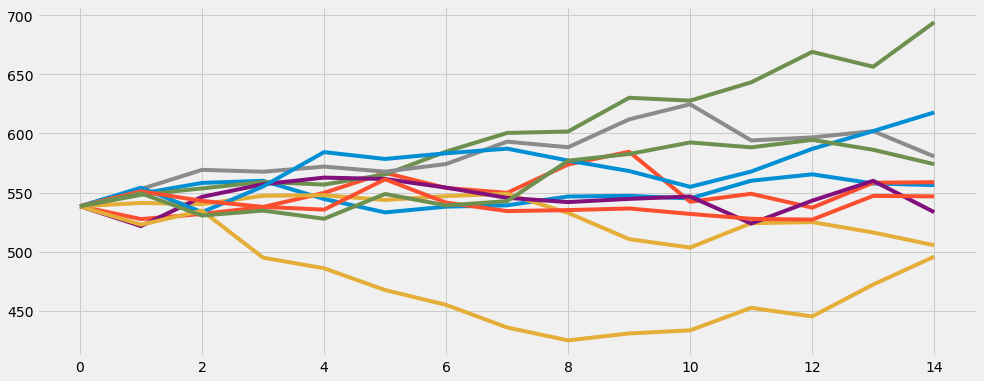

In [29]:
plt.figure(figsize=(15,6))
plt.plot(pd.DataFrame(price_paths).iloc[:,0:10])

Text(0, 0.5, 'Frequency')

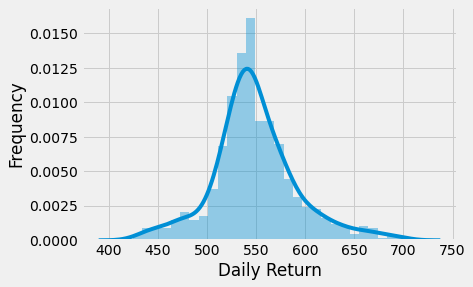

In [30]:
sns.distplot(pd.DataFrame(price_paths).iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

In [31]:
df1=pd.DataFrame(price_paths)
df1.tail()

0           1           2           3           4           5   \
10  545.025023  542.234864  503.430988  627.800953  624.677519  546.646172   
11  559.990686  548.941624  524.059636  643.289541  594.092975  523.729357   
12  565.405452  537.201769  524.958395  669.056164  596.658141  543.086784   
13  557.679865  558.281146  516.164852  656.490960  601.999850  559.937074   
14  556.306913  558.768190  505.400426  694.121355  580.523899  533.371415   

            6           7           8           9   ...          40  \
10  554.844402  531.897372  433.344597  592.386463  ...  560.814957   
11  567.771774  527.756030  452.390151  588.266938  ...  549.270035   
12  586.956146  527.051955  445.127463  594.592003  ...  542.508901   
13  602.024087  547.157710  472.120297  586.201531  ...  542.609348   
14  617.812239  546.727959  495.718253  574.004370  ...  524.615661   

            41          42          43          44          45          46  \
10  552.833423  534.519360  565.016270  536.056803  622.640850  456.569400   
11  544.132172  536.957897  577.024842  545.485417  621.973255  439.771584   
12  545.906779  539.608567  559.955129  544.886377  629.954665  443.972305   
13  548.225372  539.441099  568.086570  559.920407  647.589848  450.926685   
14  545.815562  523.511885  573.339632  554.865905  642.042647  439.299382   

            47          48          49  
10  511.951770  476.040176  618.659295  
11  519.132267  490.568347  586.593917  
12  517.667999  503.758103  609.419286  
13  508.900189  513.861859  634.832959  
14  502.346346  507.090214  658.690268  

[5 rows x 50 columns]

In [32]:
u1 = df1.mean()
var =df1.var()
u1

0     549.245927
1     550.611152
2     531.437470
3     601.912002
4     582.213237
5     545.358969
6     572.580336
7     539.661655
8     472.597009
9     560.424716
10    492.528800
11    525.404034
12    540.168861
13    547.930947
14    496.118565
15    567.322420
16    529.329125
17    550.648363
18    582.458212
19    533.336384
20    552.417634
21    563.416281
22    576.278358
23    549.142119
24    533.295681
25    527.432068
26    632.004409
27    629.075900
28    547.567045
29    543.703866
30    569.306790
31    558.238870
32    509.131981
33    560.051362
34    608.004795
35    517.487829
36    540.261472
37    492.745758
38    513.235280
39    551.195709
40    542.711588
41    541.538168
42    534.575813
43    572.952792
44    535.592409
45    600.772504
46    475.682691
47    526.818850
48    521.961953
49    594.222315
dtype: float64

In [33]:
var1 =df1.var()
var1

0       96.090307
1      252.313413
2      261.486475
3     2427.045520
4      509.328622
5      159.148236
6      524.538682
7       82.653582
8     1452.812390
9      622.435055
10     572.507684
11     183.040957
12     238.792431
13     244.257506
14     585.932539
15     498.434493
16     235.254427
17     765.129964
18     839.530911
19     151.712200
20     120.020755
21      99.624759
22     861.559245
23     497.928471
24     450.353297
25     246.881794
26    3083.640823
27    2273.155467
28     222.703428
29     292.526048
30     525.700648
31     294.724113
32    1003.267085
33     329.622267
34    1471.071902
35     111.126809
36     129.198719
37    1035.990840
38     506.524362
39     734.339446
40     136.498463
41     108.298838
42     112.557187
43     275.151598
44     207.322115
45    1248.842191
46    1158.935679
47     206.753083
48     546.177861
49    1662.931885
dtype: float64

In [34]:
u


Adj Close    0.00124
dtype: float64

In [35]:
stock_returns1 = np.log(1 + df1.pct_change())
stock_returns1.tail()

0         1         2         3         4         5         6   \
10 -0.003927 -0.075080 -0.014047 -0.003842  0.020576  0.003665 -0.023775   
11  0.027088  0.012293  0.040159  0.024372 -0.050200 -0.042827  0.023032   
12  0.009623 -0.021618  0.001714  0.039273  0.004308  0.036294  0.033231   
13 -0.013758  0.038489 -0.016893 -0.018959  0.008913  0.030555  0.025347   
14 -0.002465  0.000872 -0.021075  0.055738 -0.036326 -0.048606  0.025887   

          7         8         9   ...        40        41        42        43  \
10 -0.008628  0.006060  0.016606  ...  0.005943  0.019043 -0.015006 -0.025540   
11 -0.007816  0.043012 -0.006978  ... -0.020801 -0.015865  0.004552  0.021031   
12 -0.001335 -0.016184  0.010695  ... -0.012386  0.003256  0.004924 -0.030029   
13  0.037438  0.058873 -0.014212  ...  0.000185  0.004238 -0.000310  0.014417   
14 -0.000786  0.048774 -0.021027  ... -0.033724 -0.004405 -0.029974  0.009204   

          44        45        46        47        48        49  
10 -0.014707  0.015936  0.001511 -0.039746 -0.058676 -0.015811  
11  0.017436 -0.001073 -0.037485  0.013928  0.030062 -0.053222  
12 -0.001099  0.012751  0.009507 -0.002825  0.026532  0.038174  
13  0.027217  0.027610  0.015543 -0.017082  0.019858  0.040855  
14 -0.009068 -0.008603 -0.026124 -0.012962 -0.013266  0.036892  

[5 rows x 50 columns]

In [36]:
u1 = stock_returns1 .mean()
var =df1.var()
u1

0     0.002342
1     0.002658
2    -0.004513
3     0.018151
4     0.005386
5    -0.000665
6     0.009833
7     0.001102
8    -0.005894
9     0.004579
10   -0.008360
11   -0.004815
12    0.003895
13    0.004755
14   -0.008434
15    0.007802
16   -0.006570
17    0.005213
18    0.005964
19   -0.003343
20    0.000645
21    0.002876
22    0.009168
23   -0.001976
24   -0.005929
25   -0.000701
26    0.016023
27    0.017887
28    0.004795
29   -0.002528
30    0.008224
31    0.004932
32   -0.011275
33    0.001348
34    0.010728
35   -0.004166
36   -0.003310
37   -0.007882
38   -0.005446
39    0.006488
40   -0.001847
41    0.000982
42   -0.001998
43    0.004496
44    0.002157
45    0.012581
46   -0.014525
47   -0.004946
48   -0.004274
49    0.014409
dtype: float64

# Time Series Analysis

## SMA

In [37]:
ticker ='COKE'
df=pdr.get_data_yahoo(ticker, start='2021-01-04')
df.tail()

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2023-04-12  538.700012  539.409973  529.969971  531.000000  531.000000   19000
2023-04-13  531.000000  538.270020  530.000000  537.369995  537.369995   22500
2023-04-14  537.369995  538.099976  531.830017  535.820007  535.820007   27500
2023-04-17  537.750000  538.090027  529.679993  533.299988  533.299988   36300
2023-04-18  535.489990  538.654785  533.909973  538.359985  538.359985   16288

In [38]:
# drop unwanted columns
df.drop(['Open','High','Low','Adj Close', 'Volume'], axis=1, inplace=True)
df

Close
Date                  
2021-01-04  267.140015
2021-01-05  268.809998
2021-01-06  270.470001
2021-01-07  270.040009
2021-01-08  272.420013
...                ...
2023-04-12  531.000000
2023-04-13  537.369995
2023-04-14  535.820007
2023-04-17  533.299988
2023-04-18  538.359985

[576 rows x 1 columns]

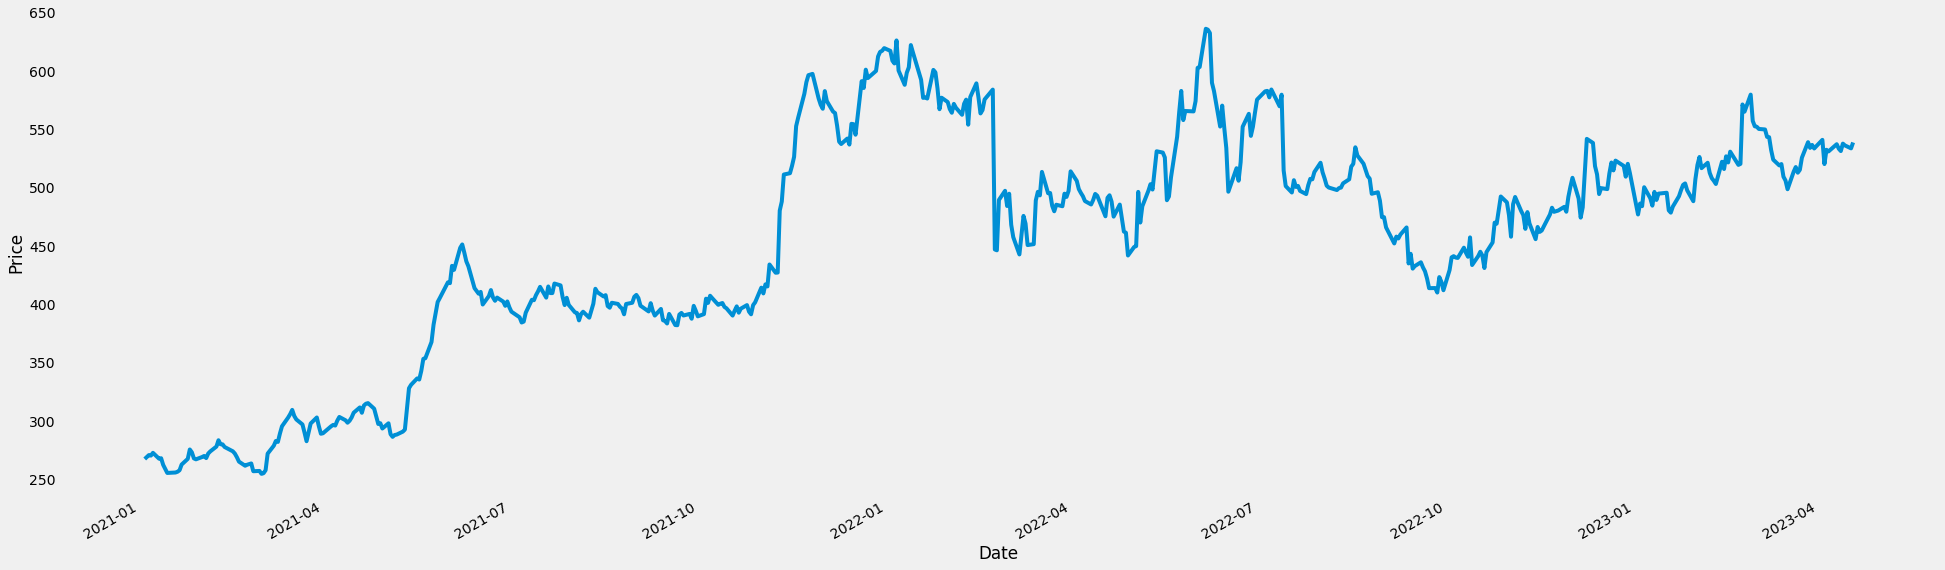

In [39]:
df['Close'].plot(figsize = (30, 10))
plt.grid()
plt.ylabel("Price")
plt.show()

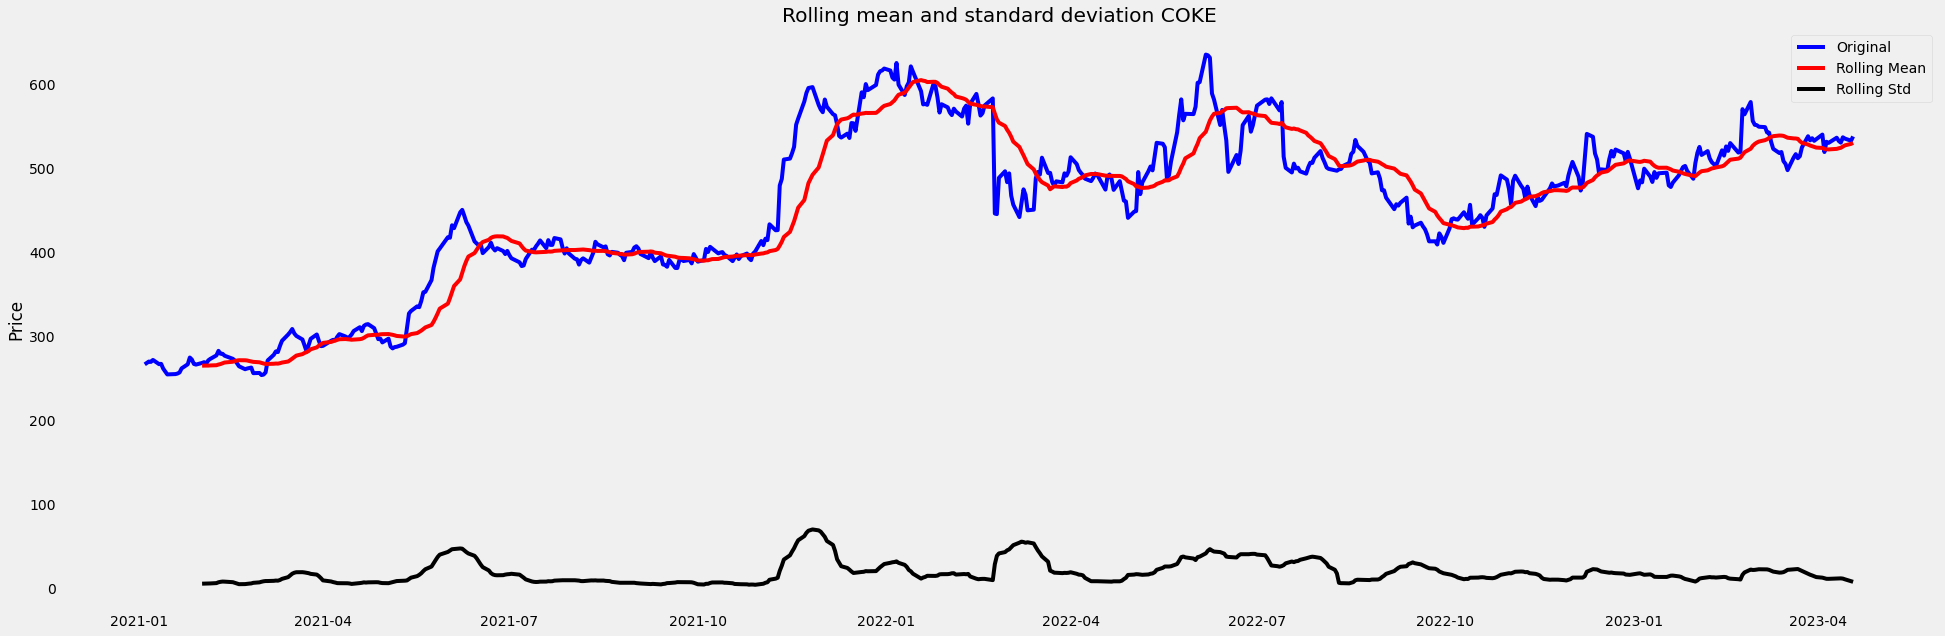

In [40]:
rolling_mean = df['Close'].rolling(20).mean()
rolling_std = df['Close'].rolling(20).std()

plt.figure(figsize = (30, 10))
fig=plt.figure(1)

orig = plt.plot(df['Close'],color='blue',label='Original')
mean = plt.plot(rolling_mean,color='red',label='Rolling Mean')
std = plt.plot(rolling_std,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation ' + 'COKE')
plt.grid()
plt.ylabel("Price")
plt.show()

In [41]:
# create 20 days simple moving average column
df['SMA20'] = df['Close'].rolling(window = 20, min_periods = 1).mean()
# create 50 days simple moving average column
df['SMA50'] = df['Close'].rolling(window = 50, min_periods = 1).mean()
# display first few rows
df

Close       SMA20       SMA50
Date                                          
2021-01-04  267.140015  267.140015  267.140015
2021-01-05  268.809998  267.975006  267.975006
2021-01-06  270.470001  268.806671  268.806671
2021-01-07  270.040009  269.115005  269.115005
2021-01-08  272.420013  269.776007  269.776007
...                ...         ...         ...
2023-04-12  531.000000  524.859999  528.485600
2023-04-13  537.369995  526.277998  529.097400
2023-04-14  535.820007  527.781499  529.434000
2023-04-17  533.299988  529.532999  529.582000
2023-04-18  538.359985  530.781998  530.022200

[576 rows x 3 columns]

In [42]:
df['Signal'] = 0.0
df['Signal'] = np.where(df['SMA20'] > df['SMA50'], 1.0, 0.0)

In [43]:
df['Position'] = df['Signal'].diff()
# display first few rows
df.head()

Close       SMA20       SMA50  Signal  Position
Date                                                            
2021-01-04  267.140015  267.140015  267.140015     0.0       NaN
2021-01-05  268.809998  267.975006  267.975006     0.0       0.0
2021-01-06  270.470001  268.806671  268.806671     0.0       0.0
2021-01-07  270.040009  269.115005  269.115005     0.0       0.0
2021-01-08  272.420013  269.776007  269.776007     0.0       0.0

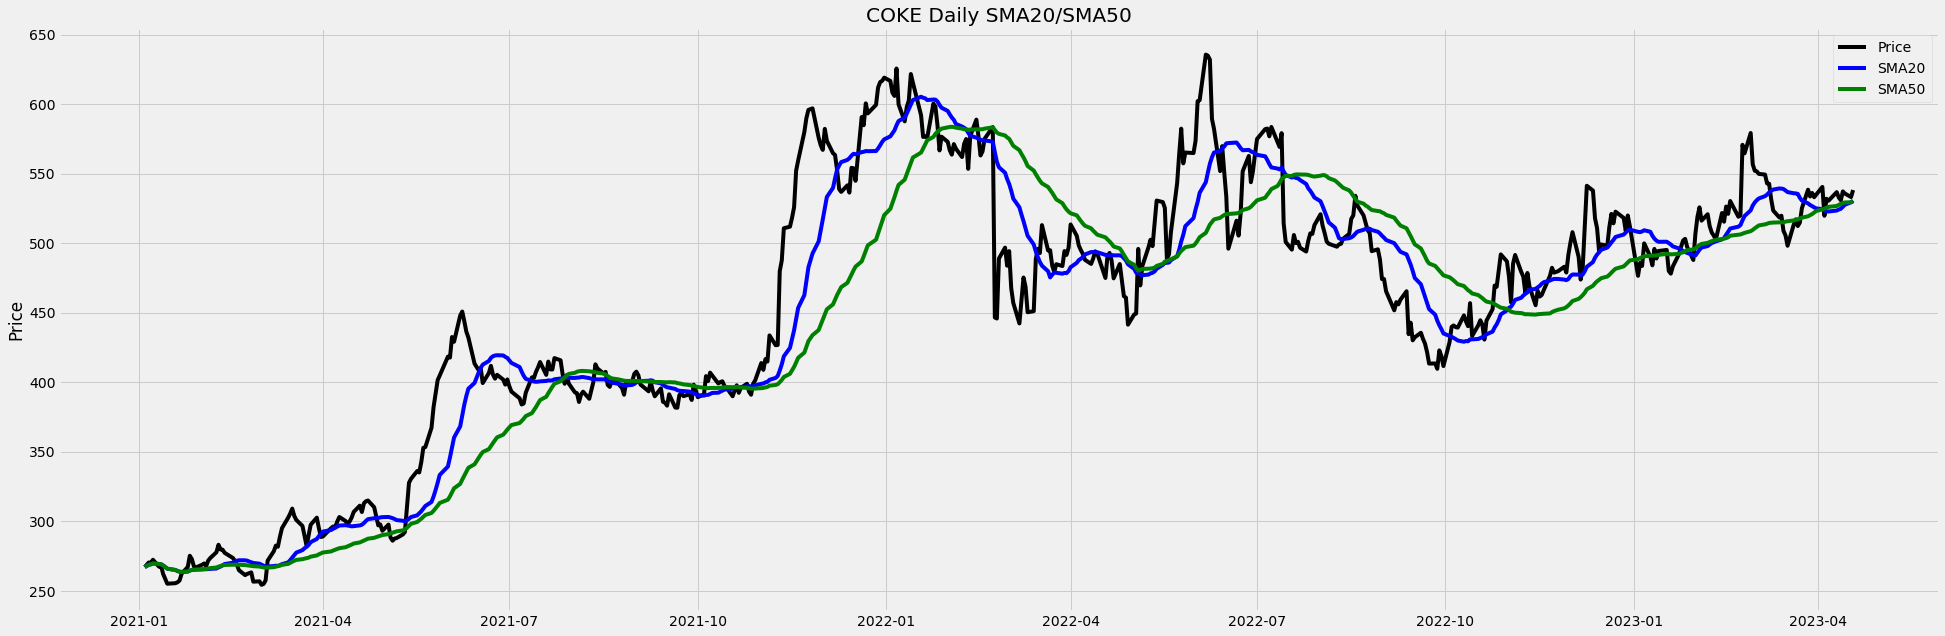

In [44]:
plt.figure(figsize=(30,10))
plt.plot(df["Close"], color="black", label="Price")
plt.plot(df["SMA20"], color="blue", label="SMA20")
plt.plot(df["SMA50"], color="green", label="SMA50")
plt.ylabel("Price")
plt.title("COKE Daily SMA20/SMA50")
plt.legend()
plt.show()

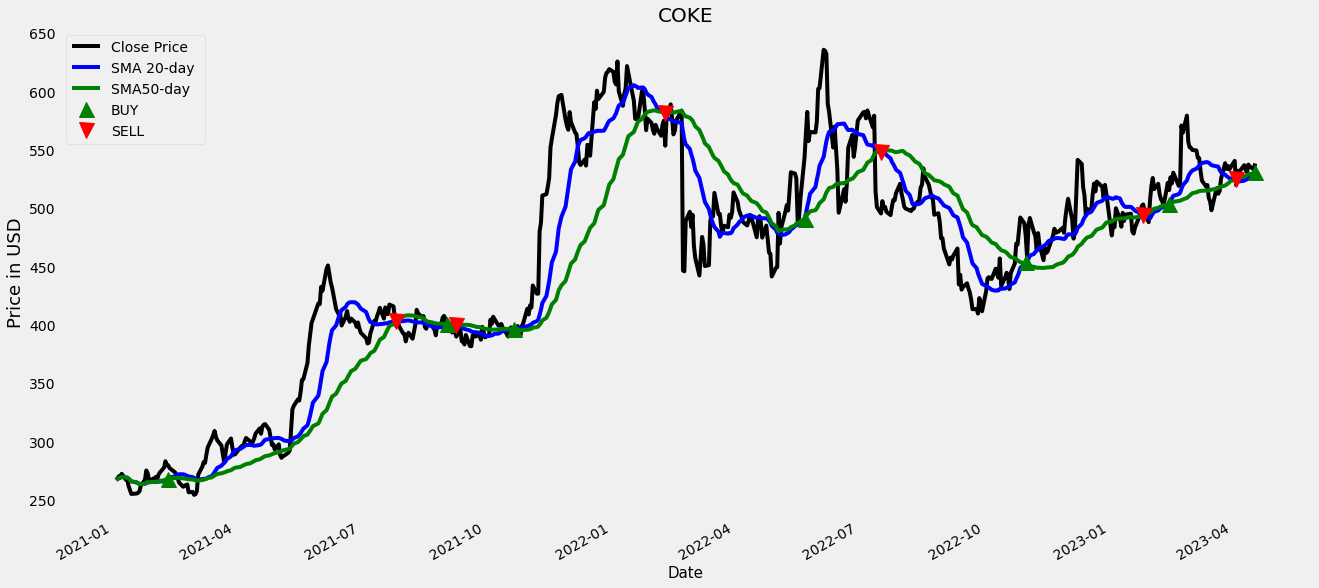

In [45]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df['Close'].plot(color = 'k', label= 'Close Price') 
df['SMA20'].plot(color = 'b',label = 'SMA 20-day ') 
df['SMA50'].plot(color = 'g', label = 'SMA50-day ')
# plot ‘buy’ signals
plt.plot(df[df['Position'] == 1].index, 
         df['SMA20'][df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'BUY')
# plot ‘sell’ signals
plt.plot(df[df['Position'] == -1].index, 
         df['SMA50'][df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'SELL')
plt.ylabel('Price in USD', fontsize = 18 )
plt.xlabel('Date', fontsize = 15 )
plt.title(ticker, fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [46]:
df_position = df[(df['Position'] == 1) | (df['Position'] == -1)]
df_position['Position'] = df_position['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_position, headers = 'keys', tablefmt = 'psql'))

+---------------------+---------+---------+---------+----------+------------+
| Date                |   Close |   SMA20 |   SMA50 |   Signal | Position   |
|---------------------+---------+---------+---------+----------+------------|
| 2021-02-11 00:00:00 |  279.68 | 268.384 | 268.351 |        1 | Buy        |
| 2021-07-28 00:00:00 |  399    | 402.981 | 403.558 |        0 | Sell       |
| 2021-09-03 00:00:00 |  398.5  | 400.921 | 400.876 |        1 | Buy        |
| 2021-09-10 00:00:00 |  390.01 | 400.063 | 400.284 |        0 | Sell       |
| 2021-10-22 00:00:00 |  395.96 | 396.691 | 396.275 |        1 | Buy        |
| 2022-02-10 00:00:00 |  553.59 | 579.597 | 581.668 |        0 | Sell       |
| 2022-05-23 00:00:00 |  543.25 | 490.799 | 490.48  |        1 | Buy        |
| 2022-07-18 00:00:00 |  495.49 | 547.344 | 548.508 |        0 | Sell       |
| 2022-11-01 00:00:00 |  476    | 453.597 | 452.075 |        1 | Buy        |
| 2023-01-26 00:00:00 |  503.25 | 493.718 | 494.296 |        0 |

### Bollinger Bands

#### movement of price and volatility over the time

In [47]:
def bb(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    return upper_bb, lower_bb

df['upper_bb'], df['lower_bb'] = bb(df['Close'], df['SMA20'], 20)
df.tail()

Close       SMA20     SMA50  Signal  Position    upper_bb  \
Date                                                                         
2023-04-12  531.000000  524.859999  528.4856     0.0       0.0  549.747585   
2023-04-13  537.369995  526.277998  529.0974     0.0       0.0  550.588166   
2023-04-14  535.820007  527.781499  529.4340     0.0       0.0  550.407130   
2023-04-17  533.299988  529.532999  529.5820     0.0       0.0  547.479032   
2023-04-18  538.359985  530.781998  530.0222     1.0       1.0  547.424253   

              lower_bb  
Date                    
2023-04-12  499.972413  
2023-04-13  501.967831  
2023-04-14  505.155868  
2023-04-17  511.586965  
2023-04-18  514.139742

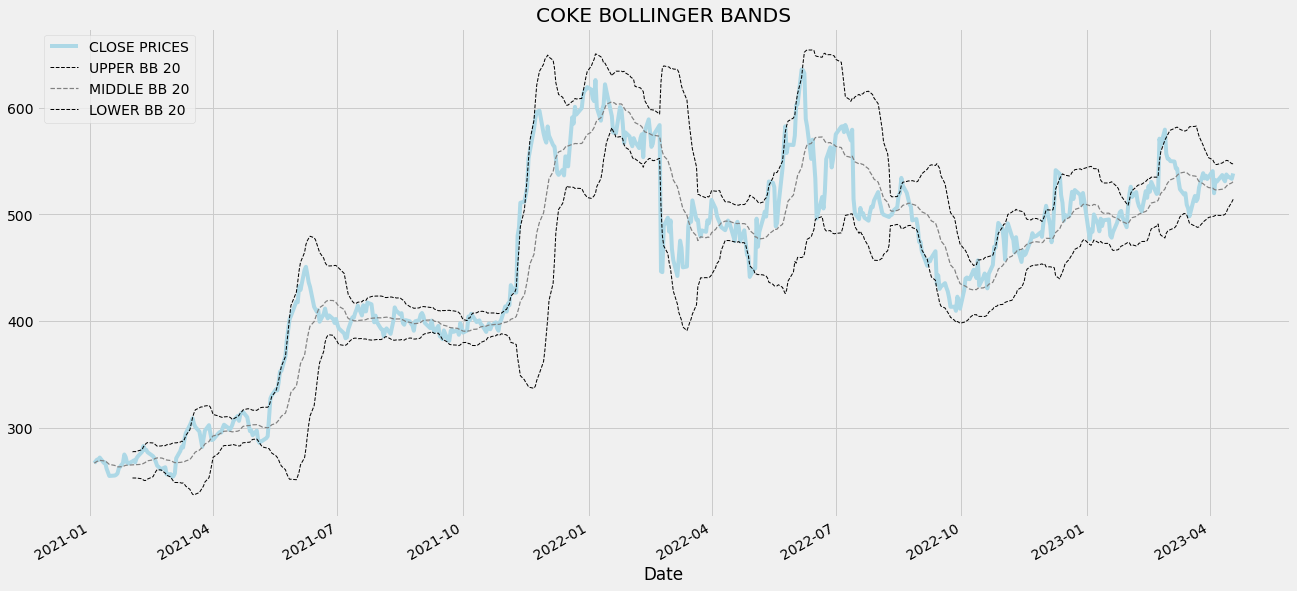

In [48]:
plt.figure(figsize = (20,10))
df['Close'].plot(label = 'CLOSE PRICES', color = 'lightblue')
df['upper_bb'].plot(label = 'UPPER BB 20', linestyle = '--', linewidth = 1, color = 'black')
df['SMA20'].plot(label = 'MIDDLE BB 20', linestyle = '--', linewidth = 1.2, color = 'grey')
df['lower_bb'].plot(label = 'LOWER BB 20', linestyle = '--', linewidth = 1, color = 'black')
plt.legend(loc = 'upper left')
plt.title('COKE BOLLINGER BANDS')
plt.show()

In [49]:
def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
            
    return buy_price, sell_price, bb_signal

buy_price, sell_price, bb_signal = implement_bb_strategy(df['Close'], df['lower_bb'], df['upper_bb'])


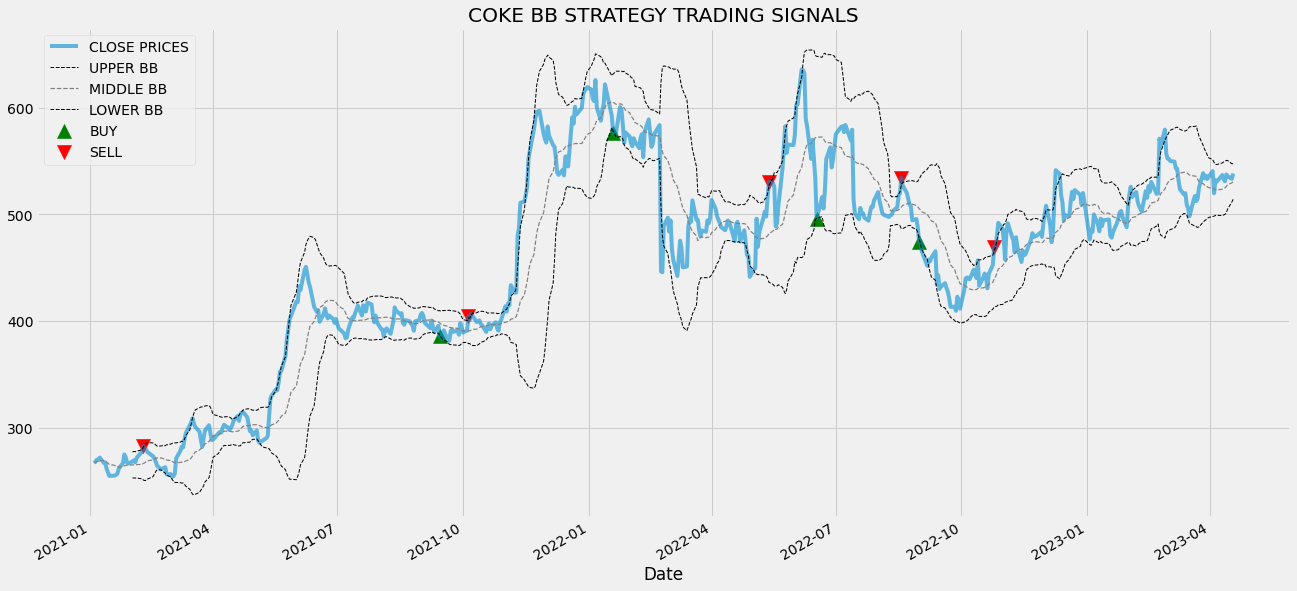

In [50]:
plt.figure(figsize = (20,10))
df['Close'].plot(label = 'CLOSE PRICES', alpha = 0.6)
df['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
df['SMA20'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'grey')
df['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(df.index, buy_price, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(df.index, sell_price, marker = 'v', color = 'red', label = 'SELL', s = 200)
plt.title('COKE BB STRATEGY TRADING SIGNALS')
plt.legend(loc = 'upper left')
plt.show()

# Forecasting

In [51]:
ticker ='COKE'
df=pdr.get_data_yahoo(ticker, start='2021-01-04')


[*********************100%***********************]  1 of 1 completed


In [52]:
df

Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2021-01-04  266.279999  269.500000  262.010010  267.140015  263.955505   23900
2021-01-05  266.029999  270.000000  264.000000  268.809998  265.605560   29000
2021-01-06  268.589996  273.000000  268.010010  270.470001  267.245789   38100
2021-01-07  270.540009  270.600006  267.339996  270.040009  266.820892   25900
2021-01-08  270.940002  272.579987  269.519989  272.420013  269.172577   27700
...                ...         ...         ...         ...         ...     ...
2023-04-12  538.700012  539.409973  529.969971  531.000000  531.000000   19000
2023-04-13  531.000000  538.270020  530.000000  537.369995  537.369995   22500
2023-04-14  537.369995  538.099976  531.830017  535.820007  535.820007   27500
2023-04-17  537.750000  538.090027  529.679993  533.299988  533.299988   36300
2023-04-18  535.489990  538.654785  533.909973  538.359985  538.359985   16288

[576 rows x 6 columns]

In [53]:
print (f"start date : {str(df.index.min())}")
print (f"end date : {str(df.index.max())}")

start date : 2021-01-04 00:00:00
end date : 2023-04-18 00:00:00


In [54]:
# Add Two new columans ds & Y (closing price ( we will do forecasting on this price) for y and date for ds.)
df=df.reset_index()
df[['ds','y']]= df[['Date','Close']]

In [55]:
df

Date        Open        High         Low       Close   Adj Close  \
0   2021-01-04  266.279999  269.500000  262.010010  267.140015  263.955505   
1   2021-01-05  266.029999  270.000000  264.000000  268.809998  265.605560   
2   2021-01-06  268.589996  273.000000  268.010010  270.470001  267.245789   
3   2021-01-07  270.540009  270.600006  267.339996  270.040009  266.820892   
4   2021-01-08  270.940002  272.579987  269.519989  272.420013  269.172577   
..         ...         ...         ...         ...         ...         ...   
571 2023-04-12  538.700012  539.409973  529.969971  531.000000  531.000000   
572 2023-04-13  531.000000  538.270020  530.000000  537.369995  537.369995   
573 2023-04-14  537.369995  538.099976  531.830017  535.820007  535.820007   
574 2023-04-17  537.750000  538.090027  529.679993  533.299988  533.299988   
575 2023-04-18  535.489990  538.654785  533.909973  538.359985  538.359985   

     Volume         ds           y  
0     23900 2021-01-04  267.140015  
1     29000 2021-01-05  268.809998  
2     38100 2021-01-06  270.470001  
3     25900 2021-01-07  270.040009  
4     27700 2021-01-08  272.420013  
..      ...        ...         ...  
571   19000 2023-04-12  531.000000  
572   22500 2023-04-13  537.369995  
573   27500 2023-04-14  535.820007  
574   36300 2023-04-17  533.299988  
575   16288 2023-04-18  538.359985  

[576 rows x 9 columns]

In [56]:
# drop the columans
ph_df=df.drop(['Date','High','Low','Open','Close','Volume','Adj Close'], axis=1)

In [57]:
ph_df.head()

ds           y
0 2021-01-04  267.140015
1 2021-01-05  268.809998
2 2021-01-06  270.470001
3 2021-01-07  270.040009
4 2021-01-08  272.420013

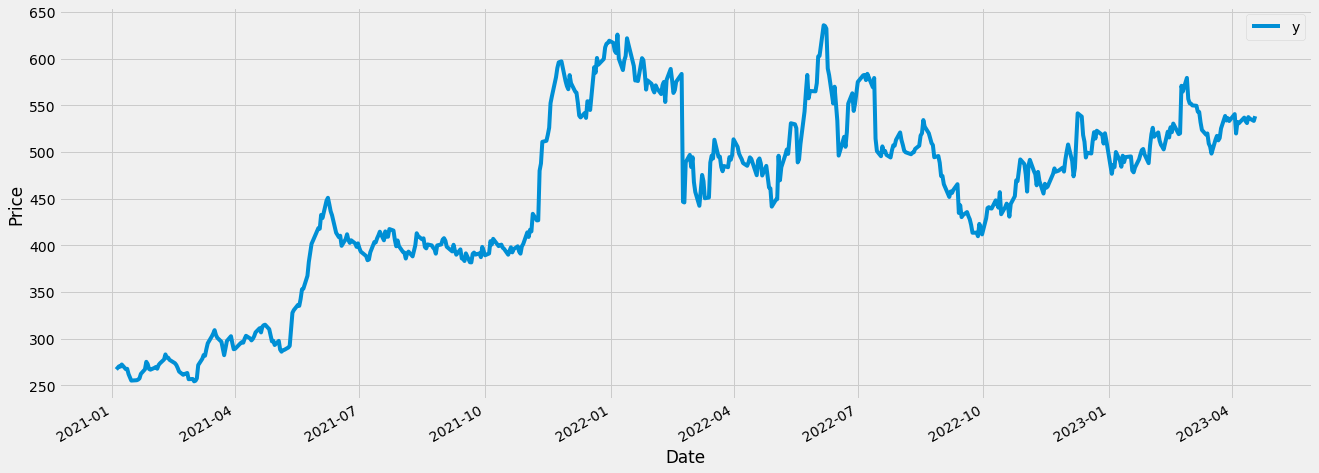

In [58]:
ax = ph_df.set_index('ds').plot(figsize=(20, 8))
ax.set_ylabel('Price')
ax.set_xlabel('Date')

plt.show()

In [59]:
import plotly.express as px
fig = go.Figure([go.Scatter(x=ph_df['ds'], y=ph_df['y'])])
fig.update_layout(title_text="Actual Prices")
fig.update_xaxes(title_text="Timeline")
fig.update_yaxes(title_text="Price")
fig.show()

In [60]:
model = Prophet(daily_seasonality=True)
model.fit(ph_df)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [61]:
future=model.make_future_dataframe(periods=15,freq='D')

In [62]:
predictions=model.predict(future)

In [63]:
predictions.tail()

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
586 2023-04-29  552.813770  481.865484  537.709955   552.591396   552.992692   
587 2023-04-30  553.023409  479.601794  535.891860   552.740034   553.282040   
588 2023-05-01  553.233047  477.444406  531.685622   552.884198   553.545318   
589 2023-05-02  553.442685  473.966204  529.160794   553.017651   553.814244   
590 2023-05-03  553.652323  470.378497  530.358982   553.151391   554.070110   

     additive_terms  additive_terms_lower  additive_terms_upper      daily  \
586      -42.774499            -42.774499            -42.774499 -20.074667   
587      -44.474770            -44.474770            -44.474770 -20.074667   
588      -48.222397            -48.222397            -48.222397 -20.074667   
589      -50.594105            -50.594105            -50.594105 -20.074667   
590      -52.374227            -52.374227            -52.374227 -20.074667   

     ...    weekly  weekly_lower  weekly_upper     yearly  yearly_lower  \
586  ...  2.509334      2.509334      2.509334 -25.209166    -25.209166   
587  ...  2.509334      2.509334      2.509334 -26.909436    -26.909436   
588  ...  0.255881      0.255881      0.255881 -28.403611    -28.403611   
589  ... -0.883510     -0.883510     -0.883510 -29.635928    -29.635928   
590  ... -1.747773     -1.747773     -1.747773 -30.551787    -30.551787   

     yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
586    -25.209166                   0.0                         0.0   
587    -26.909436                   0.0                         0.0   
588    -28.403611                   0.0                         0.0   
589    -29.635928                   0.0                         0.0   
590    -30.551787                   0.0                         0.0   

     multiplicative_terms_upper        yhat  
586                         0.0  510.039271  
587                         0.0  508.548639  
588                         0.0  505.010649  
589                         0.0  502.848580  
590                         0.0  501.278096  

[5 rows x 22 columns]

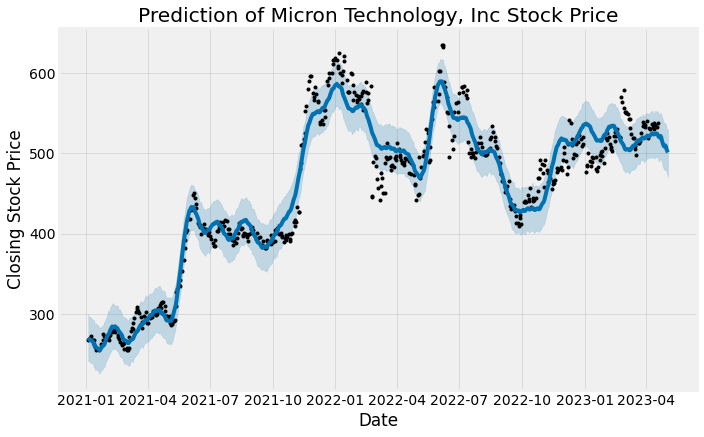

ds        yhat  yhat_lower  yhat_upper
586 2023-04-29  510.039271  481.865484  537.709955
587 2023-04-30  508.548639  479.601794  535.891860
588 2023-05-01  505.010649  477.444406  531.685622
589 2023-05-02  502.848580  473.966204  529.160794
590 2023-05-03  501.278096  470.378497  530.358982

In [64]:
model.plot(predictions)
plt.title("Prediction of Micron Technology, Inc Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()
predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

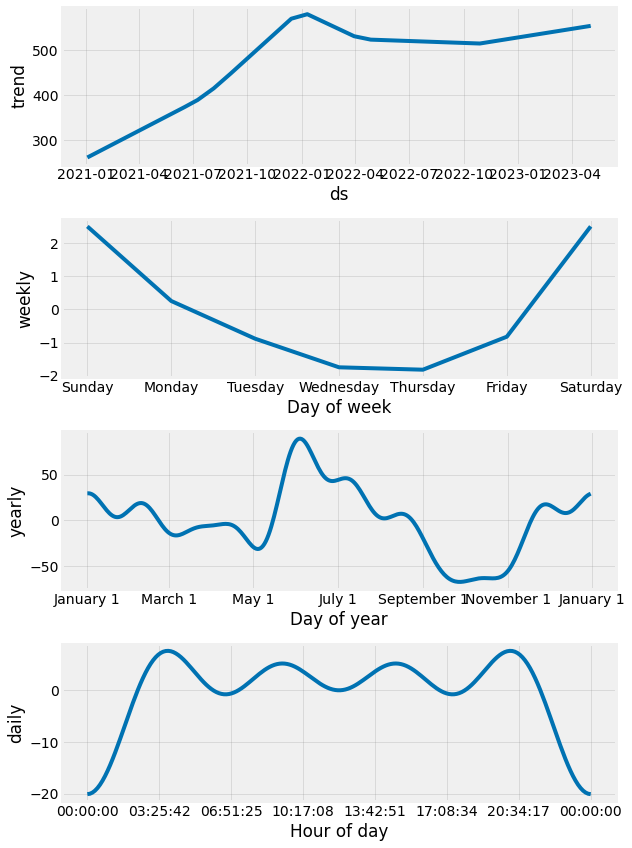

In [65]:
model.plot_components(predictions)
plt.show()

In [66]:
from prophet.plot import plot_plotly
plot_plotly(model,predictions)